In [15]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy


In [34]:
# Create the 10x10 grid map
# note that (0,0) is in the bottom-left corner
# the map is stored as a 1D list
# the cell (x,y) is indexed as [x+y*10] for x in [0,9] and y in [0,9]
# x is the horizontal axis, y is the vertical axis
# so the index looks like: 
#
# 90 91 92 93 94 95 96 97 98 99
# 80 81 82 83 84 85 86 87 88 89
# ...
# 10 11 12 13 14 15 16 17 18 19
# 00 01 02 03 04 05 06 07 08 09
#
# each element is a number storing the reward for ending up in that cell

# Create the map
state_reward_map = -np.ones(10 ** 2, dtype=int)

# Abot special grids: 
# If the agent enters an obstacle cell, it will always stay there, won't be able to move
# If the agent enters a goal cell, it will always stay and receive the goal state reward at every time step

# Define the rewards of special grids
# The obstacle cells are [[9, 9], [8, 9], [7, 9], [6, 9], [5, 9], [4, 9], [3, 9], [2, 9], [1, 9], [0, 9],
# [9, 8], [9, 7], [9, 6], [9, 5], [9, 4], [9, 3], [9, 2], [9, 1], [9, 0],
# [0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0],
# [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9],
# [3, 2], [4, 2], [5, 2], [6, 2],
# [4, 4], [4, 5], [4, 6], [4, 7], [5, 7],
# [7, 4], [7, 5]]
# Ending up in an obstacle cell receives a reward of -10 every time step
obstacle_coords = [[9, 9], [8, 9], [7, 9], [6, 9], [5, 9], [4, 9], [3, 9], [2, 9], [1, 9], [0, 9],
                  [9, 8], [9, 7], [9, 6], [9, 5], [9, 4], [9, 3], [9, 2], [9, 1], [9, 0],
                  [0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0],
                  [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9],
                  [3, 2], [4, 2], [5, 2], [6, 2],
                  [4, 4], [4, 5], [4, 6], [4, 7], [5, 7],
                  [7, 4], [7, 5]]
for cell in obstacle_coords:
    state_reward_map[cell[0] + cell[1] * 10] = -10

# Define the goal cells
goal_coords = [[8, 1]]
# Ending up in a goal cell receives a reward of 10 every time step
for cell in goal_coords:
    state_reward_map[cell[0] + cell[1] * 10] = 10
    
# Define the origin cells
origin_1_coords = [[1, 1]]
origin_2_coords = [[3, 6]]


The reward map:
[-10 -10 -10 -10 -10 -10 -10 -10 -10 -10]
[-10  -1  -1  -1  -1  -1  -1  -1  10 -10]
[-10  -1  -1 -10 -10 -10 -10  -1  -1 -10]
[-10  -1  -1  -1  -1  -1  -1  -1  -1 -10]
[-10  -1  -1  -1 -10  -1  -1 -10  -1 -10]
[-10  -1  -1  -1 -10  -1  -1 -10  -1 -10]
[-10  -1  -1  -1 -10  -1  -1  -1  -1 -10]
[-10  -1  -1  -1 -10 -10  -1  -1  -1 -10]
[-10  -1  -1  -1  -1  -1  -1  -1  -1 -10]
[-10 -10 -10 -10 -10 -10 -10 -10 -10 -10]


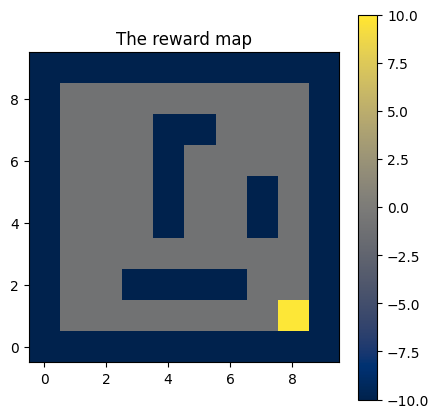

In [35]:
# Test the reward map
print("The reward map:")
for i in range(10):
    print(state_reward_map[i*10:i*10+10])

plt.figure(figsize=(5, 5))
plt.imshow(state_reward_map.reshape(10, 10), cmap='cividis', origin='lower')
plt.colorbar()
plt.title('The reward map')
plt.show()

# We can see that the map is stored upside down, the origin is in the bottom-left corner
# But when displaying, we can just set the origin to 'lower' to display it correctly
# So there is no need to manually flip the map

In [36]:
def map_x_y_to_state(x, y):
    return x + y * 10


# def flat_map_to_2D_map(flat_map):
#     """
#     Be very careful that the indexes are formulated like this
#         [[90 91 92 93 94 95 96 97 98 99],
#          [80 81 82 83 84 85 86 87 88 89],
#          ...
#          [10 11 12 13 14 15 16 17 18 19],
#          [00 01 02 03 04 05 06 07 08 09]]
#     
#     :param flat_map: (100,) or (100,1) array
#     :return: 2D array (10,10), for plotting
#     """
#     # Check if the input is a 2D array, reshape to (100,) if necessary
#     if len(flat_map.shape) == 2:
#         flat_map = flat_map.reshape(-1)
#         
#     # Convert the flat map to a 2D map
#     map_2d = np.zeros((10, 10))
#     for i in range(10):
#         for j in range(10):
#             map_2d[j, i] = flat_map[i + j * 10]
#     return map_2d   


In [40]:
test_flag = False

if test_flag:
    # Test flat_map_to_2D_map
    # Try creating a map with the obstacles and the goal represented in 1D index
    # We can first convert the above defined coordinates to 1D index
    obstacle_coords_1D = [map_x_y_to_state(cell[0], cell[1]) for cell in obstacle_coords]
    goal_coords_1D = [map_x_y_to_state(cell[0], cell[1]) for cell in goal_coords]
    origin_1_coords_1D = [map_x_y_to_state(cell[0], cell[1]) for cell in origin_1_coords]
    origin_2_coords_1D = [map_x_y_to_state(cell[0], cell[1]) for cell in origin_2_coords]
    
    # Mark the obstacles, goal, and origin cells
    state_reward_map_1D_test = np.zeros(100)
    for cell in obstacle_coords_1D:
        state_reward_map_1D_test[cell] = -10
    for cell in goal_coords_1D:
        state_reward_map_1D_test[cell] = 10
    for cell in origin_1_coords_1D:
        state_reward_map_1D_test[cell] = 5
    for cell in origin_2_coords_1D:
        state_reward_map_1D_test[cell] = -5
        
    map_2d = state_reward_map_1D_test.reshape(10, 10)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(map_2d, cmap='cividis', origin='lower')
    plt.colorbar()
    plt.title('Obs, goal, and origins highlighted')
    plt.show()


In [39]:
# Define the action list
actions = {'stay': -1, 'N': 0, 'E': 1, 'S': 2, 'W': 3}


In [41]:
# About the action rewards: 
# The robot is allowed to stay in the goal state indefinitely, and this stay action gets no reward/cost
# When in obstacle cells, the robot is forced to stay with receiving reward -10, but no additional action cost
# Taking actions at all other states (including stay), regardless of the outcome, receives a reward of -1


In [22]:
# About the action probabilities: 
# The agent moves in the intended direction with probability 0.7
# The agent moves in the left/right of the intended direction with probability 0.1
# The agent stays in the same cell with probability 0.1
# The agent won't move to the opposite direction of the intended direction

# Define a function to always make the policy matrix valid
def make_policy_valid(policy):
    """
    Make the policy matrix valid
    :param policy: a 10x10 matrix, each element is an action, the action given by the policy only depend on the state (grid)
    :return: a valid policy matrix
    """
    
    # Check if the policy matrix is 10x10
    if policy.shape != (10, 10): raise ValueError('The policy matrix should be a 10x10 matrix')
    # Each element should be an integer in [-1, 3]
    if not np.all(np.isin(policy, [-1, 0, 1, 2, 3])): raise ValueError('Each element in the policy matrix should be an integer in [-1, 3]')
    # Obstacle cells and goal cells should have no action
    obstacle_coords = [[9, 9], [8, 9], [7, 9], [6, 9], [5, 9], [4, 9], [3, 9], [2, 9], [1, 9], [0, 9], [9, 8], [9, 7], [9, 6], [9, 5], [9, 4], [9, 3], [9, 2], [9, 1], [9, 0], [0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [3, 2], [4, 2], [5, 2], [6, 2], [4, 4], [4, 5], [4, 6], [4, 7], [5, 7], [7, 4], [7, 5]]
    goal_coords = [[8, 1]]
    for cell in obstacle_coords + goal_coords:
        policy[cell[1], cell[0]] = -1
        
    return policy
            

In [23]:
# Define the transition matrix
# The transition matrix is a 100x100 matrix
# Each row corresponds to a state
# Each column corresponds to a possible next state
# The element at [row, column] is the probability of transitioning from state "row" to state "column" with the intended action
# The transition matrix is sparse (mostly zeros)

# Compute the transition matrix depending on the policy
def get_transition_matrix_old(policy):
    """
    Compute the transition matrix depending on the policy
    :param policy: a 10x10 matrix, each element is an action, the action given by the policy only depend on the state (grid)
    :return: transition matrix, a 100x100 matrix, each element is the probability of transitioning from state "row" to state "column" with the intended action
    """
    
    # # Check if the policy matrix is valid: 
    # # 10x10
    # if policy.shape != (10, 10):
    #     raise ValueError('The policy matrix should be a 10x10 matrix')
    # # Each element should be an integer in [-1, 3]
    # if not np.all(np.isin(policy, [-1, 0, 1, 2, 3])):
    #     raise ValueError('Each element in the policy matrix should be an integer in [-1, 3]')
    # # Obstacle cells and goal cells should have no action
    # obstacle_coords = [[9, 9], [8, 9], [7, 9], [6, 9], [5, 9], [4, 9], [3, 9], [2, 9], [1, 9], [0, 9], [9, 8], [9, 7], [9, 6], [9, 5], [9, 4], [9, 3], [9, 2], [9, 1], [9, 0], [0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [3, 2], [4, 2], [5, 2], [6, 2], [4, 4], [4, 5], [4, 6], [4, 7], [5, 7], [7, 4], [7, 5]]
    # goal_coords = [[8, 1]]
    # for cell in obstacle_coords + goal_coords:
    #     if policy[cell[1], cell[0]] != -1:
    #         raise ValueError('Obstacle cells and goal cells should have no action')
            
    # Initialize the transition matrix
    transition_matrix = np.zeros((100, 100))
    
    # Fill up the transition matrix
    for y in range(10):
        for x in range(10):
            current_state = x + y * 10
            
            # Check if current state is an obstacle or goal, then skip further calculations
            if state_reward_map[current_state] == -10 or state_reward_map[current_state] == 10:
                transition_matrix[current_state, current_state] = 1
                continue
            
            # Map policy action to movement
            action = policy[x, y]
            directions = [(0, 1), (1, 0), (0, -1), (-1, 0), (0, 0)]  # N, E, S, W, and stay
            action_probs = [0.7, 0.1, 0.1, 0.1]  # Probabilities for N, E, S, W, and stay
            
            for i, (dx, dy) in enumerate(directions):
                if i == action:  # Intended direction
                    prob = action_probs[0]
                elif i == 4:  # Stay
                    prob = action_probs[3]
                else:  # Side directions
                    prob = action_probs[1]

                new_x, new_y = x + dx, y + dy
                # Check for border crossing
                if 0 <= new_x < 10 and 0 <= new_y < 10:
                    new_state = new_x + new_y * 10
                    transition_matrix[current_state, new_state] += prob
                else:  # Add the probability to stay in the current state if moving out of bounds
                    transition_matrix[current_state, current_state] += prob

    return transition_matrix


In [24]:
def get_transition_matrix(policy, replacement=True):
    """
    :param replacement: True uses the new function, otherwise uses the old function to compute the transition matrix
    :param policy: (10,10) matrix, each element is an integer from -1 to 3, representing the action to take
    :return: (100,100) matrix, representing the probability of moving from state i to state j

    state i is at [i//10, i%10]
    """
    # Check if the policy matrix is valid: 
    # 10x10
    if policy.shape != (10, 10):
        raise ValueError('The policy matrix should be a 10x10 matrix')
    # Each element should be an integer in [-1, 3]
    if not np.all(np.isin(policy, [-1, 0, 1, 2, 3])):
        raise ValueError('Each element in the policy matrix should be an integer in [-1, 3]')
    # Obstacle cells and goal cells should have no action
    obstacle_coords = [[9, 9], [8, 9], [7, 9], [6, 9], [5, 9], [4, 9], [3, 9], [2, 9], [1, 9], [0, 9], [9, 8], [9, 7], [9, 6], [9, 5], [9, 4], [9, 3], [9, 2], [9, 1], [9, 0], [0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [3, 2], [4, 2], [5, 2], [6, 2], [4, 4], [4, 5], [4, 6], [4, 7], [5, 7], [7, 4], [7, 5]]
    goal_coords = [[8, 1]]
    for cell in obstacle_coords + goal_coords:
        if policy[cell[1], cell[0]] != -1:
            raise ValueError('Obstacle cells and goal cells should have no action')
    
    if replacement is True:
    
        grid_len = 10
        move_prob = 0.7
        move_p1_prob = 0.1
        move_m1_prob = 0.1
        stay_prob = 0.1
        
        T = np.zeros((grid_len ** 2, grid_len ** 2), dtype=float)
        for i in range(grid_len):  # x
            for j in range(grid_len):  # y
                state = map_x_y_to_state(i, j)  # state = i*10+j, at (i,j)
                policy_action = policy[i, j]  # action to take at (i,j) according to policy
                if policy_action == 0:  # intend to move N
                    # (i,j+1) with prob move_prob if not hit N boundary
                    # (i+1,j) with prob move_p1_prob if not hit E boundary
                    # (i-1,j) with prob move_m1_prob if not hit W boundary
                    # (i,j) with prob stay_prob (not hit any boundary), or stay_prob+move_prob (hit N boundary), or stay_prob+move_p1_prob (hit E boundary), or stay_prob+move_m1_prob (hit W boundary)
                    if j < grid_len - 1:
                        T[state, map_x_y_to_state(i, j + 1)] += move_prob
                    else:
                        T[state, state] += move_prob
                    if i < grid_len - 1:
                        T[state, map_x_y_to_state(i + 1, j)] += move_p1_prob
                    else:
                        T[state, state] += move_p1_prob
                    if i > 0:
                        T[state, map_x_y_to_state(i - 1, j)] += move_m1_prob
                    else:
                        T[state, state] += move_m1_prob
                    T[state, state] += stay_prob
    
                elif policy_action == 1:  # intend to move E
                    # (i+1,j) with prob move_prob if not hit E boundary
                    # (i,j-1) with prob move_p1_prob if not hit S boundary
                    # (i,j+1) with prob move_m1_prob if not hit N boundary
                    # (i,j) with prob stay_prob (not hit any boundary), or stay_prob+move_prob (hit E boundary), or stay_prob+move_p1_prob (hit S boundary), or stay_prob+move_m1_prob (hit N boundary)
                    if i < grid_len - 1:
                        T[state, map_x_y_to_state(i + 1, j)] += move_prob
                    else:
                        T[state, state] += move_prob
                    if j > 0:
                        T[state, map_x_y_to_state(i, j - 1)] += move_p1_prob
                    else:
                        T[state, state] += move_p1_prob
                    if j < grid_len - 1:
                        T[state, map_x_y_to_state(i, j + 1)] += move_m1_prob
                    else:
                        T[state, state] += move_m1_prob
                    T[state, state] += stay_prob
    
                elif policy_action == 2:  # intend to move S
                    # (i,j-1) with prob move_prob if not hit S boundary
                    # (i-1,j) with prob move_p1_prob if not hit W boundary
                    # (i+1,j) with prob move_m1_prob if not hit E boundary
                    # (i,j) with prob stay_prob (not hit any boundary), or stay_prob+move_prob (hit S boundary), or stay_prob+move_p1_prob (hit W boundary), or stay_prob+move_m1_prob (hit E boundary)
                    if j > 0:
                        T[state, map_x_y_to_state(i, j - 1)] += move_prob
                    else:
                        T[state, state] += move_prob
                    if i > 0:
                        T[state, map_x_y_to_state(i - 1, j)] += move_p1_prob
                    else:
                        T[state, state] += move_p1_prob
                    if i < grid_len - 1:
                        T[state, map_x_y_to_state(i + 1, j)] += move_m1_prob
                    else:
                        T[state, state] += move_m1_prob
                    T[state, state] += stay_prob
    
                elif policy_action == 3:  # intend to move W
                    # (i-1,j) with prob move_prob if not hit W boundary
                    # (i,j+1) with prob move_p1_prob if not hit N boundary
                    # (i,j-1) with prob move_m1_prob if not hit S boundary
                    # (i,j) with prob stay_prob (not hit any boundary), or stay_prob+move_prob (hit W boundary), or stay_prob+move_p1_prob (hit N boundary), or stay_prob+move_m1_prob (hit S boundary)
                    if i > 0:
                        T[state, map_x_y_to_state(i - 1, j)] += move_prob
                    else:
                        T[state, state] += move_prob
                    if j < grid_len - 1:
                        T[state, map_x_y_to_state(i, j + 1)] += move_p1_prob
                    else:
                        T[state, state] += move_p1_prob
                    if j > 0:
                        T[state, map_x_y_to_state(i, j - 1)] += move_m1_prob
                    else:
                        T[state, state] += move_m1_prob
                    T[state, state] += stay_prob
    
                else:  # -1 and otherwise, intend to stay
                    # (i,j) with prob stay_prob
                    T[state, state] += 1
    
        return T
    else:
        return get_transition_matrix_old(policy)

In [25]:
# Test get_transition_matrix
# Initialize the policy where the agent always moves W, i.e., policy[x, y] = 1 for all non-obstacle/goal cells
policy = 1 * np.ones((10, 10), dtype=int)
policy = make_policy_valid(policy)
print(policy)
print(policy[3,4])
transition_matrix = get_transition_matrix(policy, True)
print(transition_matrix)

[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1  1  1  1  1  1  1 -1 -1]
 [-1  1  1 -1 -1 -1 -1  1  1 -1]
 [-1  1  1  1  1  1  1  1  1 -1]
 [-1  1  1  1 -1  1  1 -1  1 -1]
 [-1  1  1  1 -1  1  1 -1  1 -1]
 [-1  1  1  1 -1  1  1  1  1 -1]
 [-1  1  1  1 -1 -1  1  1  1 -1]
 [-1  1  1  1  1  1  1  1  1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]
1
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [26]:
def get_action_cost_map():
    """
    :return: (100,100) matrix, representing the cost of moving from state i to state j, same dimension as the transition matrix
    
    State i is at [i//10, i%10]
    If i is an obstacle, it costs an action cost of 0 to move to itself, it also costs a state cost of 10 to stay in the obstacle, but this is not considered in the action cost
    If i is a goal, it also costs an action cost of 0 to move to itself, it receives a state reward of 10 to stay in the goal, but this is not considered in the action cost/reward
    All other moves cost an action cost of 1, regardless of whether the move is successful or not, or the end-up-state is an obstacle or goal
    
    Note that in this function, all cost are positive, rewards are negative
    When using this function, the cost matrix should be negated to get the reward matrix
    """
    grid_len = 10
    action_cost = np.ones((grid_len ** 2, grid_len ** 2), dtype=float)
    for i in range(grid_len):  # x
        for j in range(grid_len):  # y
            if [i, j] in obstacle_coords:  # obstacle, cost 0 to move to itself, cannot move to other states
                state = map_x_y_to_state(i, j)
                action_cost[state, :] = 100  # set all costs to 1000, cannot move to other states
                action_cost[state, state] = 0
            elif [i, j] in goal_coords:  # goal, cost 0 to move to itself, cannot move to other states
                state = map_x_y_to_state(i, j)
                action_cost[state, :] = 100  # set all costs to 1000, cannot move to other states
                action_cost[state, state] = 0
            else:  # other states, cost 1 to move to other states
                # since we initialize the action cost to 1, we don't need to do anything here
                pass
    return action_cost * 0  # No longer needed
    

In [27]:
# Test get_action_cost
action_cost_map = get_action_cost_map()
print(action_cost_map)

[[  0. 100. 100. ... 100. 100. 100.]
 [100.   0. 100. ... 100. 100. 100.]
 [100. 100.   0. ... 100. 100. 100.]
 ...
 [100. 100. 100. ...   0. 100. 100.]
 [100. 100. 100. ... 100.   0. 100.]
 [100. 100. 100. ... 100. 100.   0.]]


In [28]:
def policy_evaluation(policy, transition_matrix, state_reward_map, action_cost_map, gamma=0.99, theta=1e-4):
    """
    Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [10x10 numpy array] The policy to evaluate, where policy[x, y] gives the action to take at position (x, y).
        transition_matrix: [100x100 numpy array] State transition probabilities for each action.
        state_reward_map: [numpy array] Immediate rewards for all states.
        gamma: float, Discount factor.
        theta: float, A threshold of change for the value function to determine convergence.
        
    Returns:
        V: (100,) numpy array, The value for each state under the specified policy.
    """
    V = np.zeros(100)  # Initialize state-value function with zeros for each state
    iteration = 0  # Initialize iteration counter
    while True:
        iteration += 1
        delta = 0  # Initialize delta to 0 for this iteration
        # For each state, perform a "full backup"
        for s in range(100):
            v = V[s]  # Store the current value of state s
            # Get the action recommended by the policy for state s
            x, y = s % 10, s // 10  # Convert state index to grid position, s = x + y*10
            action = policy[x, y]  # Retrieve action from policy
            # Initialize a new value for state s
            new_value = 0
            # For each possible next state, calculate the contribution to the new value
            for s_prime in range(100):
                # Action affects transition probability: transition_matrix[action][s, s_prime]
                # However, we already generated the transition matrix for current policy
                # i.e. we no longer need a complete transition matrix with the [action] index
                new_value += transition_matrix[s, s_prime] * (state_reward_map[s_prime] - action_cost_map[s, s_prime] + gamma * V[s_prime])
            # Update the value of state s in V
            V[s] = new_value
            # Calculate the maximum change in value across all states seen so far
            delta = max(delta, abs(v - V[s]))
        # Check if the change in value function is below the threshold for all states
        if delta < theta:
            break
    print(f'Policy evaluated in {iteration} iterations')
    return V


Policy evaluated in 1147 iterations
-197.993252890784 -1057.3259330912294 -1097.3380931846918


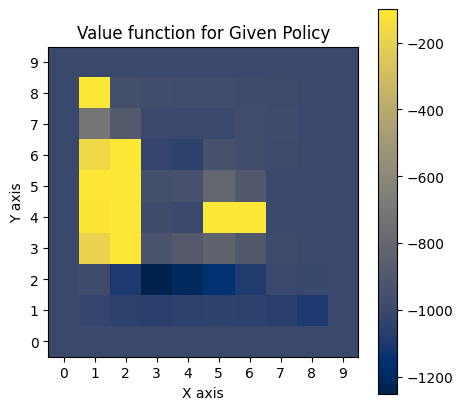

In [29]:
# Test policy_evaluation
# Initialize the policy where the agent always moves W, i.e., policy[x, y] = 1 for all non-obstacle/goal cells
policy = 1 * np.ones((10, 10), dtype=int)
policy = make_policy_valid(policy)
transition_matrix = get_transition_matrix(policy)
V = policy_evaluation(policy, transition_matrix, state_reward_map, action_cost_map)
print(V[map_x_y_to_state(1,3)], V[map_x_y_to_state(3,1)], V[map_x_y_to_state(8,1)])

# Convert V to a 10x10 matrix for visualization
# Be careful that the origin is in the bottom-left corner
V_2D = V.reshape(10, 10)

# Visualize the value function
# V[map_x_y_to_state(8, 1)] = 100  # Use this to indentify the goal state
plt.figure(figsize=(5, 5))
plt.imshow(V_2D, cmap='cividis', origin='lower')
plt.colorbar()
plt.title('Value function for Given Policy')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()


In [30]:
def policy_improvement(V, policy, transition_matrix, state_reward_map, action_cost_map, gamma=0.9):
    """
    Improve a policy given the value function.
    
    Args:
        V: [numpy array] The value for each state under the specified policy.
        policy: [10x10 numpy array] The policy to evaluate, where policy[x, y] gives the action to take at position (x, y).
        transition_matrix: [100x100 numpy array] State transition probabilities for each action.
        state_reward_map: [numpy array] Immediate rewards for all states.
        gamma: float, Discount factor.
        
    Returns:
        policy: [10x10 numpy array] The improved policy.
        policy_stable: [bool] Whether the policy is stable.
    """
    obstacle_coords = [[9, 9], [8, 9], [7, 9], [6, 9], [5, 9], [4, 9], [3, 9], [2, 9], [1, 9], [0, 9],
                  [9, 8], [9, 7], [9, 6], [9, 5], [9, 4], [9, 3], [9, 2], [9, 1], [9, 0],
                  [0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0],
                  [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9],
                  [3, 2], [4, 2], [5, 2], [6, 2],
                  [4, 4], [4, 5], [4, 6], [4, 7], [5, 7],
                  [7, 4], [7, 5]]
    goal_coords = [[8, 1]]
    
    obstacle_states = [map_x_y_to_state(cell[0], cell[1]) for cell in obstacle_coords]
    goal_states = [map_x_y_to_state(cell[0], cell[1]) for cell in goal_coords]    
    
    policy_stable = True  # Initialize policy_stable to True
    for s in range(100):
        # Skip the obstacle and goal states
        if s in obstacle_states or s in goal_states:
            continue
        
        old_action = policy[s % 10, s // 10]  # Retrieve action from policy at state s (x,y)
        # Initialize the best action and value for state s
        best_action = None
        best_value = float('-inf')
        # For each possible action, calculate the value of the state
        for action in range(4):
            new_value = 0
            
            # a_kp1(s) = argmax_a expectation[ r(s,a) + gamma * V(s') ]
            for s_prime in range(100):
                new_value += transition_matrix[s, s_prime] * (state_reward_map[s_prime] - action_cost_map[s, s_prime] + gamma * V[s_prime])
            # Update the best action and value if a better action is found
            if new_value > best_value:
                best_value = new_value
                best_action = action
            
        # Update the policy with the best action for state s (x,y)
        policy[s % 10, s // 10] = best_action
        # Check if the best action is different from the old action
        if best_action != old_action:
            policy_stable = False
             
    return policy, policy_stable

In [31]:
def policy_iteration(policy, state_reward_map, action_cost_map, gamma=0.9, theta=1e-4, save_for_vis=False, max_iter=50):
    """
    Perform policy iteration to find the optimal policy.
    
    Args:
        policy: [10x10 numpy array] The initial policy to evaluate.
        state_reward_map: [numpy array] Immediate rewards for all states.
        gamma: float, Discount factor.
        theta: float, A threshold of change for the value function to determine convergence.
        
    Returns:
        policy: [10x10 numpy array] The optimal policy.
    """
    policy_stable = False  # Initialize policy_stable to False
    
    # We want to save the evaluation and improvement results in the first 5 iterations and the last iteration
    # This is to visualize the policy improvement process
    V_list = []
    policy_list = []
    iteration = 0
    while iteration < max_iter:
        iteration += 1
        transition_matrix = get_transition_matrix(policy)
        V = policy_evaluation(policy, transition_matrix, state_reward_map, action_cost_map, gamma, theta)
        policy, policy_stable = policy_improvement(V, policy, transition_matrix, state_reward_map, action_cost_map, gamma)
        policy = make_policy_valid(policy)
        if iteration <= 5 or policy_stable:
            V_list.append(V)
            policy_list.append(policy)
        if policy_stable:
            break
            
    print(f'Policy iteration converged in {iteration} iterations')
    
    if save_for_vis:
        return policy, policy_stable, V_list, policy_list
    else:
        return policy, policy_stable
    

In [33]:
# Test policy_iteration
# Initialize the policy where the agent always moves N, i.e., policy[x, y] = 1 for all non-obstacle/goal cells
policy = 1 * np.ones((10, 10), dtype=int)
policy = make_policy_valid(policy)
transition_matrix = get_transition_matrix(policy)
policy, convergence = policy_iteration(policy, state_reward_map, action_cost_map)
print("Converged =", convergence)
print(policy)


Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 111 iterations
Policy evaluated in 

In [ ]:
# Visualize the policy using arrows
# The origin is in the bottom-left corner
# The arrows are in the same direction as the action
# The arrows are in the center of the cell
# No arrow is shown for obstacle cells and goal cells
plt.figure(figsize=(5, 5))
plt.imshow(V_2D, cmap='cividis', origin='lower')
plt.colorbar()
plt.title('Optimal Policy')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel('X axis')
plt.ylabel('Y axis')
# policy[3, 7] = 3  # Use this to see if the policy is correctly visualized at desired coordinates
for y in range(10):
    for x in range(10):
        if [x, y] in obstacle_coords or [x, y] in goal_coords:
            continue
        if policy[x, y] == 0:  # N
            plt.arrow(x, y, 0, 0.4, head_width=0.1, head_length=0.1, fc='r', ec='r')
        elif policy[x, y] == 1:  # E
            plt.arrow(x, y, 0.4, 0, head_width=0.1, head_length=0.1, fc='r', ec='r')
        elif policy[x, y] == 2:  # S
            plt.arrow(x, y, 0, -0.4, head_width=0.1, head_length=0.1, fc='r', ec='r')
        elif policy[x, y] == 3:  # W
            plt.arrow(x, y, -0.4, 0, head_width=0.1, head_length=0.1, fc='r', ec='r')
plt.show()
